In [22]:
## 🔹 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt


## 🔹 Step 2: Load the Dataset (GlobalTemperatures.csv)
# Read the CSV
df = pd.read_csv("GlobalTemperatures.csv")
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
## 🔹 Step 3: Convert 'dt' Column to Datetime Format
df['dt'] = pd.to_datetime(df['dt'])

## 🔹 Step 4: Clean the Data (Drop null values)
df = df[['dt', 'LandAverageTemperature']].dropna()

In [24]:
## 🔹 Step 5: Filter Data from 1950 Onwards
df_recent = df[df['dt'].dt.year >= 1950].copy()
df_recent['year'] = df_recent['dt'].dt.year

In [25]:
## 🔹 Step 6: Group by Year and Calculate Average Temperature
yearly_avg = df_recent.groupby('year')['LandAverageTemperature'].mean().reset_index()
yearly_avg.head()

,year,LandAverageTemperature
0,1950,8.365250
1,1951,8.625667
2,1952,8.638250
3,1953,8.873750
4,1954,8.560667


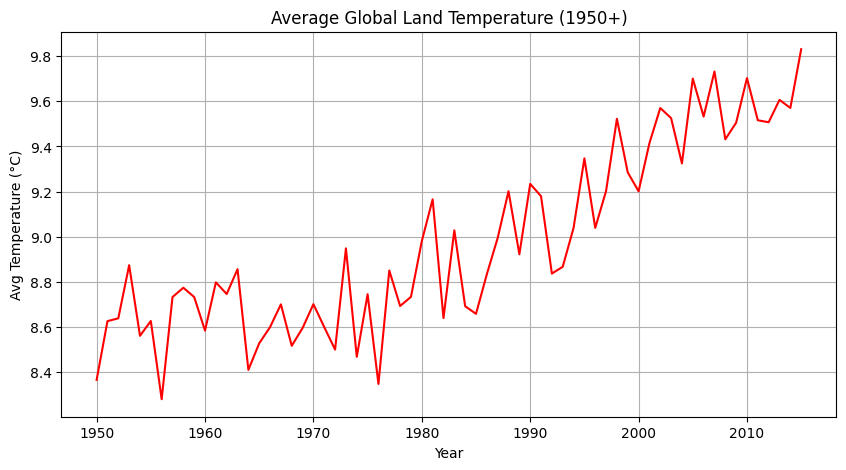

In [26]:
## 🔹 Step 7: Visualize the Trend using Line Chart
plt.figure(figsize=(10,5))
plt.plot(yearly_avg['year'], yearly_avg['LandAverageTemperature'], color='red')
plt.title("Average Global Land Temperature (1950+)")
plt.xlabel("Year")
plt.ylabel("Avg Temperature (°C)")
plt.grid(True)
plt.savefig("temperature_plot.png")  # Save graph as image
plt.show()


In [27]:
yearly_avg.to_csv("temperature_trend.csv", index=False)
print("Saved filtered average temperature to temperature_trend.csv")


Saved filtered average temperature to temperature_trend.csv
